In [1]:
#Importing the librearies:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Loading the data from the specified route:

data = pd.read_csv("D:\Rubix\ml_models\data\wind_turbine_data.csv")


In [3]:
#Exploring the data:

print(data.head())
print(data.describe())
print(data.info())


          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  
       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         50530.000000      50530.000000                   50530.000000   
mean           1307.684332          7.557952                    1492.175463   
std            1312.459242          4.227166                

In [4]:
# Filtering out rows with negative or zero LV ActivePower values:

data = data[data['LV ActivePower (kW)'] > 0]

# Removing missing values:

data = data.dropna()

# Printing the first 5 rows of the cleaned dataset:

print(data.head())

# Printing the data description:

print(data.describe())

          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  
       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         39692.000000      39692.000000                   39692.000000   
mean           1664.751281          8.769781                    1829.739672   
std            1264.303861          3.773594                

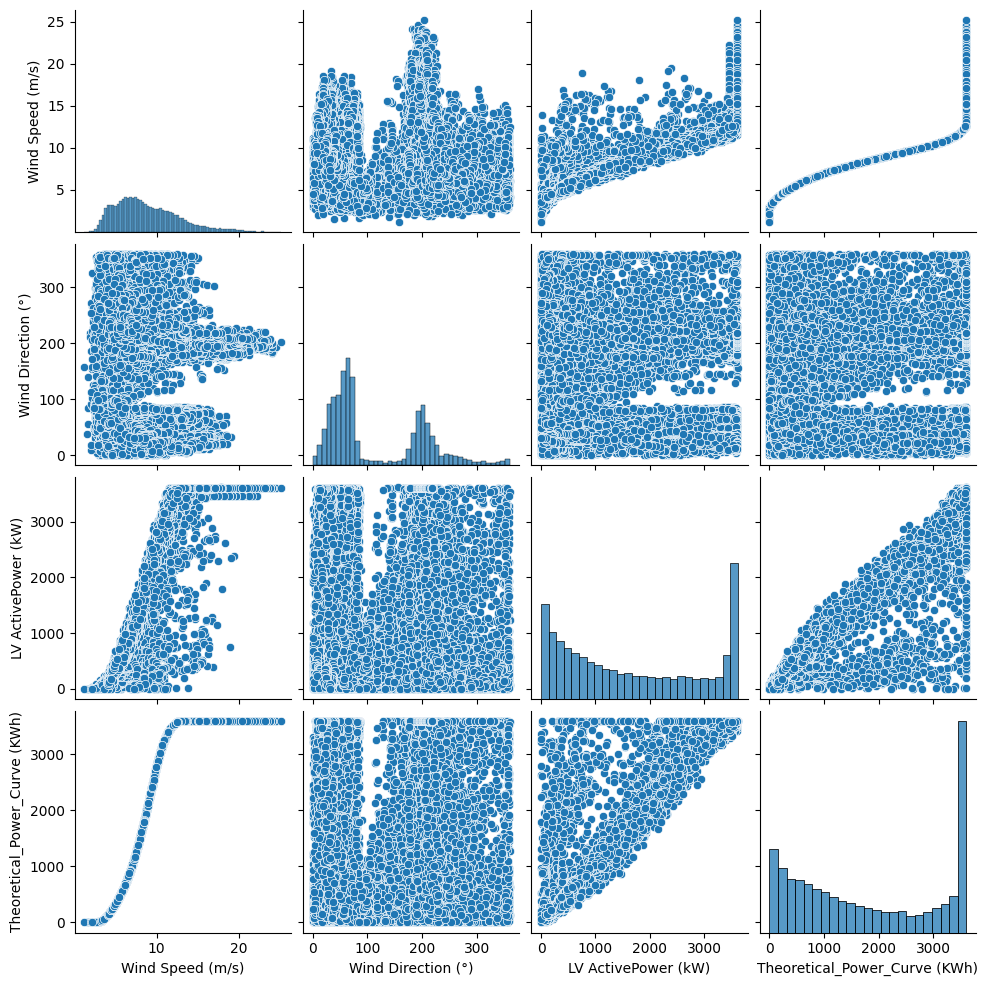

In [5]:
# Creating Pair plot of Wind Speed, Wind Direction, LV ActivePower, and Theoretical_Power_Curve

sns.pairplot(data=data, vars=["Wind Speed (m/s)", "Wind Direction (°)", "LV ActivePower (kW)", "Theoretical_Power_Curve (KWh)"])
plt.show()

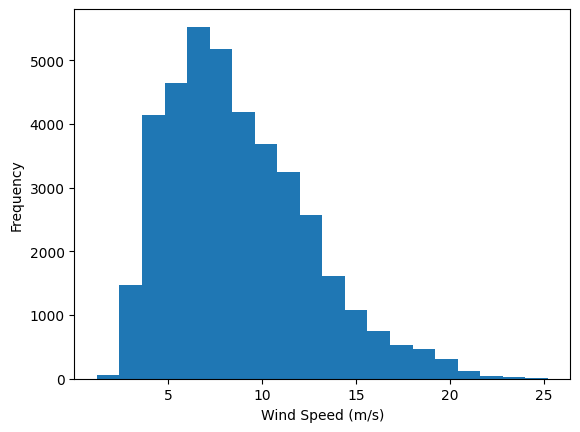

In [6]:
plt.hist(data["Wind Speed (m/s)"], bins=20)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

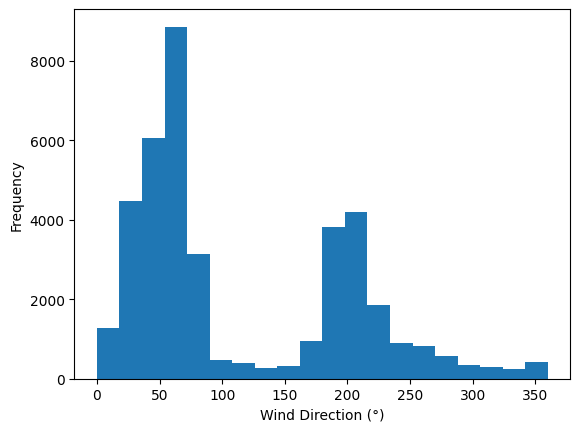

In [7]:
plt.hist(data["Wind Direction (°)"], bins=20)
plt.xlabel("Wind Direction (°)")
plt.ylabel("Frequency")
plt.show()

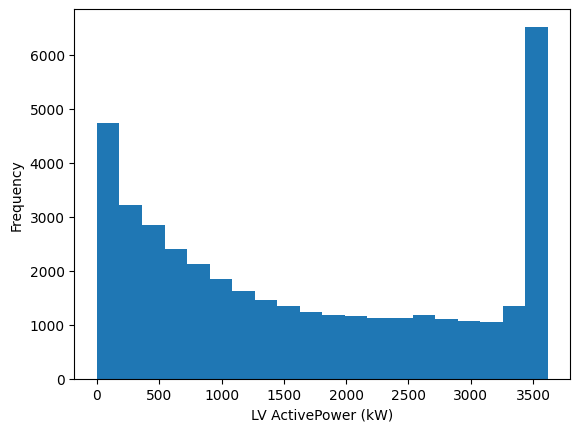

In [8]:
plt.hist(data["LV ActivePower (kW)"], bins=20)
plt.xlabel("LV ActivePower (kW)")
plt.ylabel("Frequency")
plt.show()

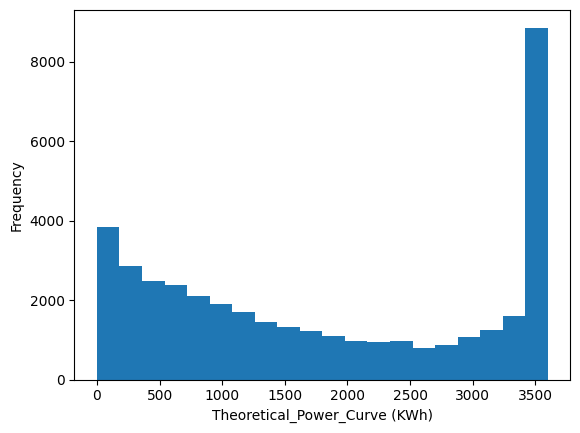

In [9]:
plt.hist(data["Theoretical_Power_Curve (KWh)"], bins=20)
plt.xlabel("Theoretical_Power_Curve (KWh)")
plt.ylabel("Frequency")
plt.show()

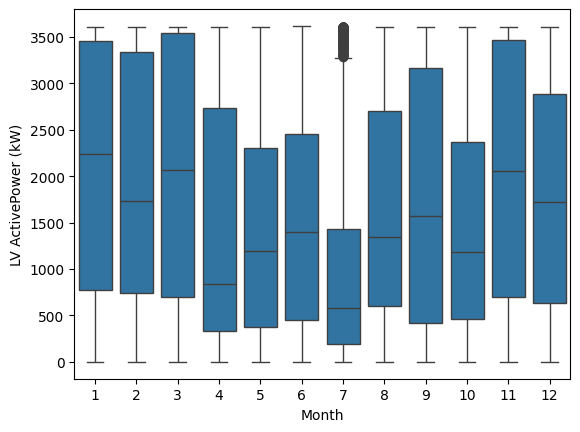

In [10]:
# Box plot of LV ActivePower by month
data["Month"] = pd.to_datetime(data["Date/Time"]).dt.month
sns.boxplot(x="Month", y="LV ActivePower (kW)", data=data)
plt.xlabel("Month")
plt.ylabel("LV ActivePower (kW)")
plt.show()

In [13]:
# Importing the necessary libraries:

from sklearn.model_selection import train_test_split

# Preparing the data:

X = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']

# Here, the X variable to a subset of the original data is assigned , which includes 
# only the desired features to use for prediction: wind speed, wind direction, and 
# theoretical power curve. The y variable to the target variable is assigned, this 
# variable is the desired to predict, which is the LV ActivePower (kW).


# Splitting the data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# This line of code is using train_test_split() to split the data into training and testing sets.

# The X and y variables are the data that will be split.
# test_size=0.2 means that we want to use 20% of the data for testing and 80% for training.
# random_state=0 is an optional parameter that sets the random seed for reproducibility.
# The train_test_split() function returns four outputs: X_train, X_test, y_train, and y_test.

# X_train and y_train are the training sets for the features and target variable, respectively.
# X_test and y_test are the testing sets for the features and target variable, respectively."

# The training data can be used to build our model and the testing data to evaluate its performance.

In [14]:
# Importing the necessary libraries:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparing the data:

X = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']

# Splitting the data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model:

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model, calculating metrics:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the coefficients and intercept:

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Coefficients: [50.847803    0.30246839  0.80591175]
Intercept: -291.06722981959615
Mean Squared Error: 72844.5515919574
Mean Absolute Error: 137.72002673118854
R-squared: 0.9547508782620041


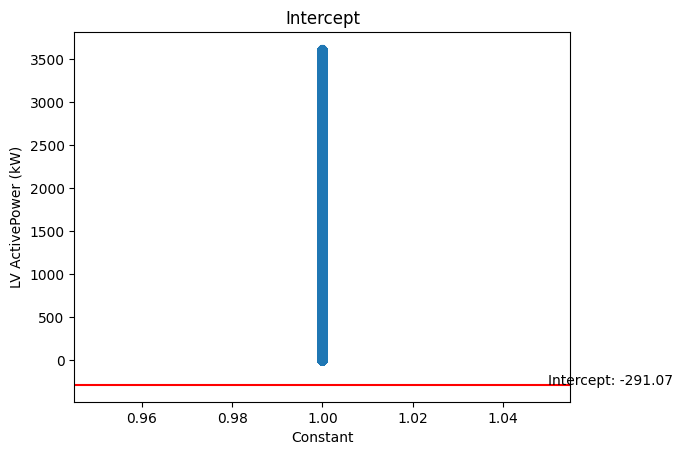

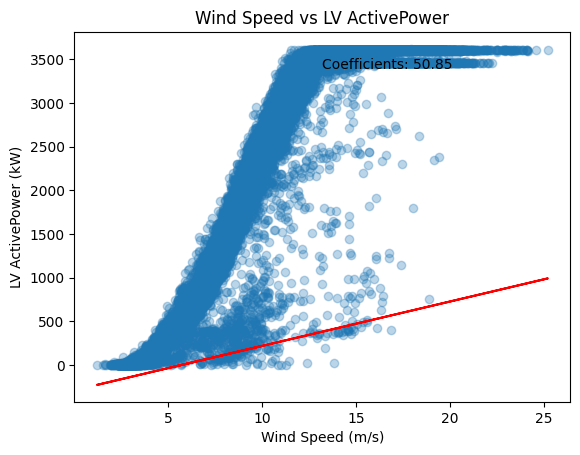

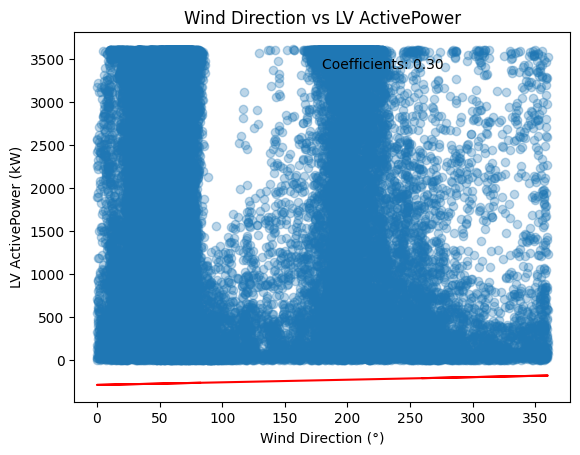

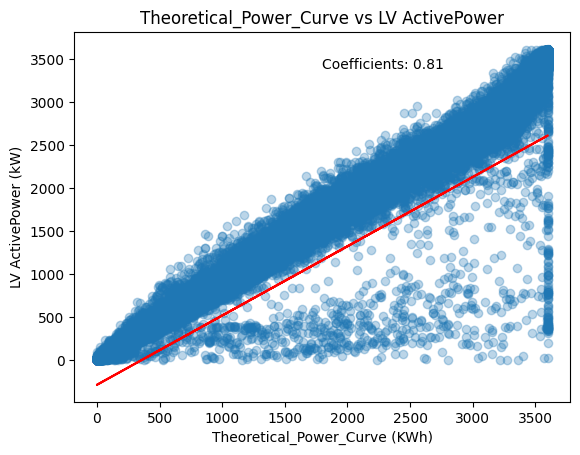

In [15]:
import matplotlib.pyplot as plt

# Plotting LV ActivePower vs constant value of 1.0:

plt.scatter([1.0] * len(data), data['LV ActivePower (kW)'], alpha=0.3)
plt.axhline(y=model.intercept_, color='red', linestyle='-')
plt.xlabel('Constant')
plt.ylabel('LV ActivePower (kW)')
plt.title('Intercept')
plt.text(1.05, model.intercept_, f"Intercept: {model.intercept_:.2f}")
plt.show()

# Plotting Wind Speed vs LV ActivePower:

plt.scatter(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], alpha=0.3)
plt.plot(data['Wind Speed (m/s)'], model.coef_[0] * data['Wind Speed (m/s)'] + model.intercept_, color='red')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind Speed vs LV ActivePower')
plt.text(0.5, 0.9, 'Coefficients: {:.2f}'.format(model.coef_[0]), transform=plt.gca().transAxes)
plt.show()


# Plotting Wind Direction vs LV ActivePower:

plt.scatter(data['Wind Direction (°)'], data['LV ActivePower (kW)'], alpha=0.3)
plt.plot(data['Wind Direction (°)'], model.coef_[1] * data['Wind Direction (°)'] + model.intercept_, color='red')
plt.xlabel('Wind Direction (°)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind Direction vs LV ActivePower')
plt.text(0.5, 0.9, 'Coefficients: {:.2f}'.format(model.coef_[1]), transform=plt.gca().transAxes)
plt.show()

# Plotting Theoretical_Power_Curve vs LV ActivePower:

plt.scatter(data['Theoretical_Power_Curve (KWh)'], data['LV ActivePower (kW)'], alpha=0.3)
plt.plot(data['Theoretical_Power_Curve (KWh)'], model.coef_[2] * data['Theoretical_Power_Curve (KWh)'] + model.intercept_, color='red')
plt.xlabel('Theoretical_Power_Curve (KWh)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Theoretical_Power_Curve vs LV ActivePower')
plt.text(0.5, 0.9, 'Coefficients: {:.2f}'.format(model.coef_[2]), transform=plt.gca().transAxes)
plt.show()


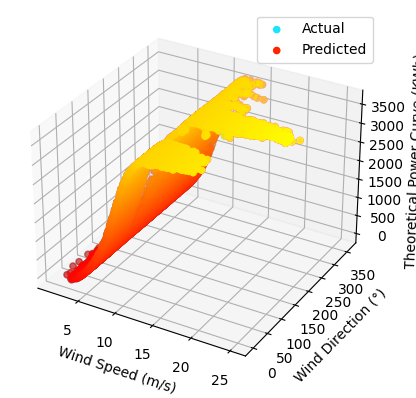

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Input variables:

wind_speed = data['Wind Speed (m/s)']
wind_direction = data['Wind Direction (°)']
power_curve = data['Theoretical_Power_Curve (KWh)']

# Target variable:

active_power = data['LV ActivePower (kW)']

# Prediction function:

def predict_energy_model(wind_speed, wind_direction, power_curve):
    return 50.847803 * wind_speed + 0.30246839 * wind_direction + 0.80591175 * power_curve - 291.0672298195989

# Generating data for the plot:

x = np.array(wind_speed)
y = np.array(wind_direction)
z = np.array(power_curve)
c = np.array(active_power)
c_pred = np.array(predict_energy_model(wind_speed, wind_direction, power_curve))

# Creating the plot:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=c, cmap='cool', label='Actual')
ax.scatter(x, y, z, c=c_pred, cmap='autumn', label='Predicted')
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Wind Direction (°)')
ax.set_zlabel('Theoretical Power Curve (KWh)')
ax.legend()
plt.show()


In [17]:
# Importing the necessary libraries:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparing the data: 

X = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']

# Splitting the data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model:

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model, calculating metrics:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics:

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



Mean Squared Error: 72844.5515919574
Mean Absolute Error: 137.72002673118854
R-squared: 0.9547508782620041


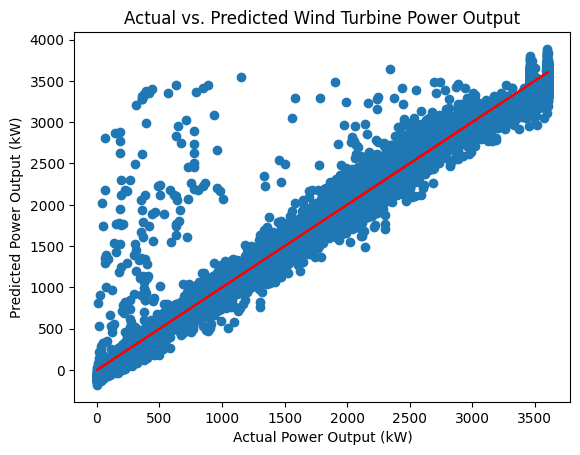

In [18]:
# Creating a scatter plot of the actual output (y_test) vs. the predicted output (y_pred) using matplotlib's scatter() function:

plt.scatter(y_test, y_pred)

# Adding a line representing perfect predictions (i.e., y_test = y_pred) using matplotlib's plot() function:

plt.plot(y_test, y_test, color='red')

# Adding labels for the x-axis, y-axis, and title using matplotlib's xlabel(), ylabel(), and title() functions:

plt.xlabel("Actual Power Output (kW)")
plt.ylabel("Predicted Power Output (kW)")
plt.title("Actual vs. Predicted Wind Turbine Power Output")

## Displaying the plot using matplotlib's show() function:

plt.show()

In [20]:
import pickle

filename = "wind_turbine_regression.pickle"

# save model
pickle.dump(model, open(filename, "wb"))

# load model
loaded_model = pickle.load(open(filename, "rb"))


In [22]:
loaded_model.predict([[
5.58462905883789, 253.480697631835, 493.677652137077]])

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([467.42940912])